# Exploratory Data Analysis

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [108]:
# Read the dataset
pd.set_option('display.max_columns', None)
df = pd.read_csv("Amazon Sale Report.csv")

In [109]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [110]:
del df['index']
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [111]:
df = df.rename({'Sales Channel':'sales_channel', 'ship-service-level':'ship_service_level', 'Courier Status':'courier_status', 'Qty':'Quantity','ship-city':'ship_city','ship-state':'ship_state', 'ship-postal-code':'ship_postal_code', 'ship-country':'ship_country','fulfilled-by':'fulfilled_by','PendingS':'pendings', 'Fulfilment':'fulfilment', 'Status':'status'}, axis=1)

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   status              128976 non-null  object 
 3   fulfilment          128976 non-null  object 
 4   sales_channel       128976 non-null  object 
 5   ship_service_level  128976 non-null  object 
 6   Category            128976 non-null  object 
 7   Size                128976 non-null  object 
 8   courier_status      128976 non-null  object 
 9   Quantity            128976 non-null  int64  
 10  currency            121176 non-null  object 
 11  Amount              121176 non-null  float64
 12  ship_city           128941 non-null  object 
 13  ship_state          128941 non-null  object 
 14  ship_postal_code    128941 non-null  float64
 15  ship_country        128941 non-nul

In [113]:
columns_list = [
    'fulfilment', 
    'status', 
    'sales_channel', 
    'ship_service_level', 
    'Category', 
    'courier_status', 
    'currency', 
    'ship_city', 
    'ship_state',
    'Size',
    'ship_country',
    'fulfilled_by',
    'New',
    'pendings',
    'B2B',
    'ship_postal_code'
    
]

existing_columns_list = [col for col in columns_list if col in df.columns]

print(existing_columns_list)


['fulfilment', 'status', 'sales_channel', 'ship_service_level', 'Category', 'courier_status', 'currency', 'ship_city', 'ship_state', 'Size', 'ship_country', 'fulfilled_by', 'New', 'pendings', 'B2B', 'ship_postal_code']


In [114]:
# label Encoding Technique----


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in existing_columns_list:
    df[i] = le.fit_transform(df[i]).astype(int)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   status              128976 non-null  int32  
 3   fulfilment          128976 non-null  int32  
 4   sales_channel       128976 non-null  int32  
 5   ship_service_level  128976 non-null  int32  
 6   Category            128976 non-null  int32  
 7   Size                128976 non-null  int32  
 8   courier_status      128976 non-null  int32  
 9   Quantity            128976 non-null  int64  
 10  currency            128976 non-null  int32  
 11  Amount              121176 non-null  float64
 12  ship_city           128976 non-null  int32  
 13  ship_state          128976 non-null  int32  
 14  ship_postal_code    128976 non-null  int32  
 15  ship_country        128976 non-nul

In [116]:
df.head()

,Order ID,Date,status,fulfilment,sales_channel,ship_service_level,Category,Size,courier_status,Quantity,currency,Amount,ship_city,ship_state,ship_postal_code,ship_country,B2B,fulfilled_by,New,pendings
0,405-8078784-5731545,04-30-22,0,1,0,1,5,7,1,0,0,647.62,4793,28,2477,0,0,0,0,0
1,171-9198151-1101146,04-30-22,5,1,0,1,2,0,2,1,0,406.00,775,23,4856,0,0,0,0,0
2,404-0687676-7273146,04-30-22,3,0,0,0,2,8,2,1,0,329.00,5351,28,2671,0,1,1,0,0
3,403-9615377-8133951,04-30-22,0,1,0,1,0,5,1,0,0,753.33,6138,43,5657,0,0,0,0,0
4,407-1069790-7240320,04-30-22,3,0,0,0,6,0,2,1,0,574.00,1464,56,5547,0,0,1,0,0


In [117]:
# Split the data Features into categorical, numerical----


cateogrical_features = []
numerical_features = []

for i in df.columns:
    if df[i].dtype == 'object':
        cateogrical_features.append(i)
    else:
        numerical_features.append(i)
print(f"These are the Categorical Features: {cateogrical_features}\n", end='')
print("\n")
print(f"These are the Numerical Features: {numerical_features}", end='')

These are the Categorical Features: ['Order ID', 'Date']


These are the Numerical Features: ['status', 'fulfilment', 'sales_channel', 'ship_service_level', 'Category', 'Size', 'courier_status', 'Quantity', 'currency', 'Amount', 'ship_city', 'ship_state', 'ship_postal_code', 'ship_country', 'B2B', 'fulfilled_by', 'New', 'pendings']

# Descriptive Statstics

In [118]:
print(f"Minimum Value of Amount {df['Amount'].min()}")
print(f"Mean Value of Amount {df['Amount'].mean()}")
print(f"Median Value of Amount  {df['Amount'].median()}")
print(f"Minimum Value of Amount {df['Amount'].max()}")

Minimum Value of Amount 0.0
Mean Value of Amount 648.5621760909748
Median Value of Amount  605.0
Minimum Value of Amount 5584.0


In [119]:
df.corr()

,status,fulfilment,sales_channel,ship_service_level,Category,Size,courier_status,Quantity,currency,Amount,ship_city,ship_state,ship_postal_code,ship_country,B2B,fulfilled_by,New,pendings
status,1.000000,0.469620,0.006856,0.463738,-0.034345,-0.018570,0.321503,0.560869,-0.435224,0.008406,-0.001341,-0.003046,-0.006049,0.002197,0.011647,-0.469620,NaN,NaN
fulfilment,0.469620,1.000000,-0.020522,0.980515,-0.077788,-0.018935,-0.084992,-0.159181,-0.045132,-0.004822,0.013970,-0.004742,0.001564,0.002399,0.005252,-1.000000,NaN,NaN
sales_channel,0.006856,-0.020522,1.000000,0.045979,0.006330,0.000092,0.064052,0.043793,0.122272,NaN,0.046746,-0.026781,-0.019043,-0.000511,-0.002559,0.020522,NaN,NaN
ship_service_level,0.463738,0.980515,0.045979,1.000000,-0.075755,-0.018535,-0.079765,-0.152462,-0.037672,-0.039959,0.015255,-0.005861,-0.000257,0.002083,0.003719,-0.980515,NaN,NaN
Category,-0.034345,-0.077788,0.006330,-0.075755,1.000000,0.018353,0.007561,0.011269,0.001244,0.252211,0.001380,-0.018285,-0.074413,0.000172,-0.002668,0.077788,NaN,NaN
Size,-0.018570,-0.018935,0.000092,-0.018535,0.018353,1.000000,-0.004059,-0.007295,0.012575,-0.020462,0.006176,-0.000740,0.015879,-0.001527,-0.005888,0.018935,NaN,NaN
courier_status,0.321503,-0.084992,0.064052,-0.079765,0.007561,-0.004059,1.000000,0.825365,-0.783759,0.021861,-0.008571,-0.012031,-0.009592,-0.001533,0.007968,0.084992,NaN,NaN
Quantity,0.560869,-0.159181,0.043793,-0.152462,0.011269,-0.007295,0.825365,1.000000,-0.714895,0.066750,-0.012479,-0.006849,-0.013887,-0.002485,0.015810,0.159181,NaN,NaN
currency,-0.435224,-0.045132,0.122272,-0.037672,0.001244,0.012575,-0.783759,-0.714895,1.000000,NaN,0.015073,0.004391,0.008368,-0.000230,-0.009818,0.045132,NaN,NaN
Amount,0.008406,-0.004822,NaN,-0.039959,0.252211,-0.020462,0.021861,0.066750,NaN,1.000000,-0.000715,-0.004783,-0.030994,-0.003167,0.015560,0.004822,NaN,NaN


In [120]:
df.describe()

,status,fulfilment,sales_channel,ship_service_level,Category,Size,courier_status,Quantity,currency,Amount,ship_city,ship_state,ship_postal_code,ship_country,B2B,fulfilled_by,New,pendings
count,128976.000000,128976.000000,128976.000000,128976.000000,128976.000000,128976.000000,128976.000000,128976.000000,128976.000000,121176.000000,128976.000000,128976.000000,128976.000000,128976.000000,128976.000000,128976.000000,128976.0,128976.0
mean,3.162123,0.304421,0.000961,0.312818,3.293853,6.322153,1.906417,0.904401,0.060476,648.562176,3875.797102,33.958411,3856.514693,0.000271,0.006761,0.695579,0.0,0.0
std,1.784154,0.460164,0.030992,0.463643,1.958893,2.858778,0.529644,0.313368,0.238368,281.185041,2392.028554,18.485668,2496.502987,0.016471,0.081947,0.460164,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,3.000000,0.000000,0.000000,0.000000,2.000000,5.000000,2.000000,1.000000,0.000000,449.000000,1606.000000,23.000000,2149.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,3.000000,0.000000,0.000000,0.000000,2.000000,7.000000,2.000000,1.000000,0.000000,605.000000,3615.500000,28.000000,3789.000000,0.000000,0.000000,1.000000,0.0,0.0
75%,3.000000,1.000000,0.000000,1.000000,5.000000,8.000000,2.000000,1.000000,0.000000,788.000000,5601.000000,56.000000,5499.000000,0.000000,0.000000,1.000000,0.0,0.0
max,12.000000,1.000000,1.000000,1.000000,8.000000,10.000000,3.000000,15.000000,1.000000,5584.000000,8948.000000,69.000000,9454.000000,1.000000,1.000000,1.000000,0.0,0.0


# Cateogorical Feature

In [121]:
df.duplicated().sum()

959

In [122]:
df.nunique()

Order ID              120229
Date                      91
status                    13
fulfilment                 2
sales_channel              2
ship_service_level         2
Category                   9
Size                      11
courier_status             4
Quantity                  10
currency                   2
Amount                  1408
ship_city               8949
ship_state                70
ship_postal_code        9455
ship_country               2
B2B                        2
fulfilled_by               2
New                        1
pendings                   1
dtype: int64

In [123]:
df.drop_duplicates()

,Order ID,Date,status,fulfilment,sales_channel,ship_service_level,Category,Size,courier_status,Quantity,currency,Amount,ship_city,ship_state,ship_postal_code,ship_country,B2B,fulfilled_by,New,pendings
0,405-8078784-5731545,04-30-22,0,1,0,1,5,7,1,0,0,647.62,4793,28,2477,0,0,0,0,0
1,171-9198151-1101146,04-30-22,5,1,0,1,2,0,2,1,0,406.00,775,23,4856,0,0,0,0,0
2,404-0687676-7273146,04-30-22,3,0,0,0,2,8,2,1,0,329.00,5351,28,2671,0,1,1,0,0
3,403-9615377-8133951,04-30-22,0,1,0,1,0,5,1,0,0,753.33,6138,43,5657,0,0,0,0,0
4,407-1069790-7240320,04-30-22,3,0,0,0,6,0,2,1,0,574.00,1464,56,5547,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,406-6001380-7673107,05-31-22,3,0,0,0,2,8,2,1,0,517.00,2904,57,3771,0,0,1,0,0
128972,402-9551604-7544318,05-31-22,3,0,0,0,5,6,2,1,0,999.00,2618,19,112,0,0,1,0,0
128973,407-9547469-3152358,05-31-22,3,0,0,0,0,10,2,1,0,690.00,2904,57,3804,0,0,1,0,0
128974,402-6184140-0545956,05-31-22,3,0,0,0,5,9,2,1,0,1199.00,2936,18,2247,0,0,1,0,0


In [124]:
df.head()

,Order ID,Date,status,fulfilment,sales_channel,ship_service_level,Category,Size,courier_status,Quantity,currency,Amount,ship_city,ship_state,ship_postal_code,ship_country,B2B,fulfilled_by,New,pendings
0,405-8078784-5731545,04-30-22,0,1,0,1,5,7,1,0,0,647.62,4793,28,2477,0,0,0,0,0
1,171-9198151-1101146,04-30-22,5,1,0,1,2,0,2,1,0,406.00,775,23,4856,0,0,0,0,0
2,404-0687676-7273146,04-30-22,3,0,0,0,2,8,2,1,0,329.00,5351,28,2671,0,1,1,0,0
3,403-9615377-8133951,04-30-22,0,1,0,1,0,5,1,0,0,753.33,6138,43,5657,0,0,0,0,0
4,407-1069790-7240320,04-30-22,3,0,0,0,6,0,2,1,0,574.00,1464,56,5547,0,0,1,0,0


# Feature Engineering Techiniques

In [125]:
df.head()

,Order ID,Date,status,fulfilment,sales_channel,ship_service_level,Category,Size,courier_status,Quantity,currency,Amount,ship_city,ship_state,ship_postal_code,ship_country,B2B,fulfilled_by,New,pendings
0,405-8078784-5731545,04-30-22,0,1,0,1,5,7,1,0,0,647.62,4793,28,2477,0,0,0,0,0
1,171-9198151-1101146,04-30-22,5,1,0,1,2,0,2,1,0,406.00,775,23,4856,0,0,0,0,0
2,404-0687676-7273146,04-30-22,3,0,0,0,2,8,2,1,0,329.00,5351,28,2671,0,1,1,0,0
3,403-9615377-8133951,04-30-22,0,1,0,1,0,5,1,0,0,753.33,6138,43,5657,0,0,0,0,0
4,407-1069790-7240320,04-30-22,3,0,0,0,6,0,2,1,0,574.00,1464,56,5547,0,0,1,0,0


In [126]:
df.isnull().sum()

Order ID                 0
Date                     0
status                   0
fulfilment               0
sales_channel            0
ship_service_level       0
Category                 0
Size                     0
courier_status           0
Quantity                 0
currency                 0
Amount                7800
ship_city                0
ship_state               0
ship_postal_code         0
ship_country             0
B2B                      0
fulfilled_by             0
New                      0
pendings                 0
dtype: int64

In [127]:
df.head()

,Order ID,Date,status,fulfilment,sales_channel,ship_service_level,Category,Size,courier_status,Quantity,currency,Amount,ship_city,ship_state,ship_postal_code,ship_country,B2B,fulfilled_by,New,pendings
0,405-8078784-5731545,04-30-22,0,1,0,1,5,7,1,0,0,647.62,4793,28,2477,0,0,0,0,0
1,171-9198151-1101146,04-30-22,5,1,0,1,2,0,2,1,0,406.00,775,23,4856,0,0,0,0,0
2,404-0687676-7273146,04-30-22,3,0,0,0,2,8,2,1,0,329.00,5351,28,2671,0,1,1,0,0
3,403-9615377-8133951,04-30-22,0,1,0,1,0,5,1,0,0,753.33,6138,43,5657,0,0,0,0,0
4,407-1069790-7240320,04-30-22,3,0,0,0,6,0,2,1,0,574.00,1464,56,5547,0,0,1,0,0


In [128]:
df[df.duplicated()]

,Order ID,Date,status,fulfilment,sales_channel,ship_service_level,Category,Size,courier_status,Quantity,currency,Amount,ship_city,ship_state,ship_postal_code,ship_country,B2B,fulfilled_by,New,pendings
167,407-3742007-3242711,04-30-22,3,0,0,0,2,7,2,1,0,517.0,2904,57,3840,0,0,1,0,0
201,408-5748499-6859555,04-30-22,3,0,0,0,5,5,2,1,0,653.0,1413,10,503,0,0,1,0,0
202,406-7807733-3785945,04-30-22,5,1,0,1,2,7,2,1,0,399.0,2904,57,3788,0,0,0,0,0
203,407-5443024-5233168,04-30-22,0,0,0,0,5,0,0,0,1,NaN,2904,57,3766,0,0,1,0,0
204,402-4393761-0311520,04-30-22,3,0,0,0,2,10,2,1,0,363.0,1694,56,5516,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128358,402-3963904-1085913,06-01-2022,0,0,0,0,5,5,0,0,1,NaN,6950,57,3781,0,0,1,0,0
128373,407-3748395-2933152,06-01-2022,3,0,0,0,2,0,2,1,0,399.0,775,23,4808,0,0,1,0,0
128496,406-7346635-7865146,06-01-2022,3,0,0,0,2,8,2,1,0,292.0,775,23,4849,0,0,1,0,0
128909,403-6757403-6097100,05-31-22,0,0,0,0,5,0,0,0,1,NaN,2571,59,813,0,0,1,0,0


In [129]:
df.isnull().sum()

Order ID                 0
Date                     0
status                   0
fulfilment               0
sales_channel            0
ship_service_level       0
Category                 0
Size                     0
courier_status           0
Quantity                 0
currency                 0
Amount                7800
ship_city                0
ship_state               0
ship_postal_code         0
ship_country             0
B2B                      0
fulfilled_by             0
New                      0
pendings                 0
dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128976 non-null  object 
 1   Date                128976 non-null  object 
 2   status              128976 non-null  int32  
 3   fulfilment          128976 non-null  int32  
 4   sales_channel       128976 non-null  int32  
 5   ship_service_level  128976 non-null  int32  
 6   Category            128976 non-null  int32  
 7   Size                128976 non-null  int32  
 8   courier_status      128976 non-null  int32  
 9   Quantity            128976 non-null  int64  
 10  currency            128976 non-null  int32  
 11  Amount              121176 non-null  float64
 12  ship_city           128976 non-null  int32  
 13  ship_state          128976 non-null  int32  
 14  ship_postal_code    128976 non-null  int32  
 15  ship_country        128976 non-nul

In [131]:
df.shape

(128976, 20)

In [132]:
df.size

2579520

In [133]:
df.columns

Index(['Order ID', 'Date', 'status', 'fulfilment', 'sales_channel',
       'ship_service_level', 'Category', 'Size', 'courier_status', 'Quantity',
       'currency', 'Amount', 'ship_city', 'ship_state', 'ship_postal_code',
       'ship_country', 'B2B', 'fulfilled_by', 'New', 'pendings'],
      dtype='object')

In [134]:
# Convert 'Date' column to datetime format---

df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')


# Check for any null values after conversion---

null_dates = df['Date'].isnull().sum()
print(f"Number of null values in 'Date' column after conversion: {null_dates}")

Number of null values in 'Date' column after conversion: 55109


In [135]:
df = df.dropna(subset=['Date'])

In [136]:
# Group by date and calculate total sales---


sales_over_time = df.groupby(df['Date'].dt.to_period('M')).agg({'Amount': 'sum'}).reset_index()
sales_over_time['Date'] = sales_over_time['Date'].dt.to_timestamp()

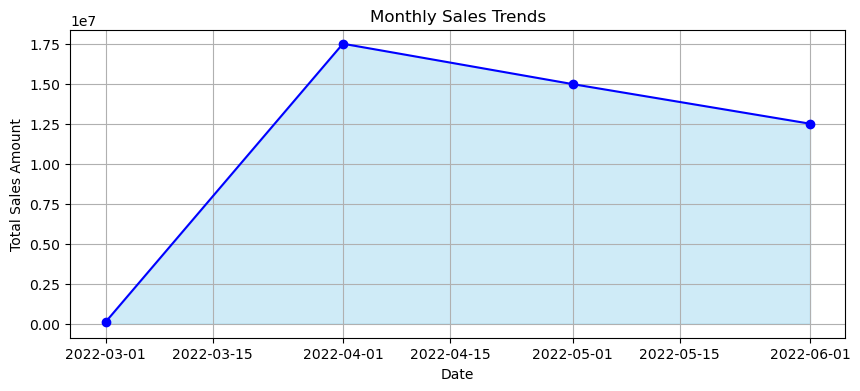

In [137]:
# Plot sales trends over time---

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.fill_between(sales_over_time['Date'], sales_over_time['Amount'], color='skyblue', alpha=0.4)
plt.plot(sales_over_time['Date'], sales_over_time['Amount'], marker='o', color='blue')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

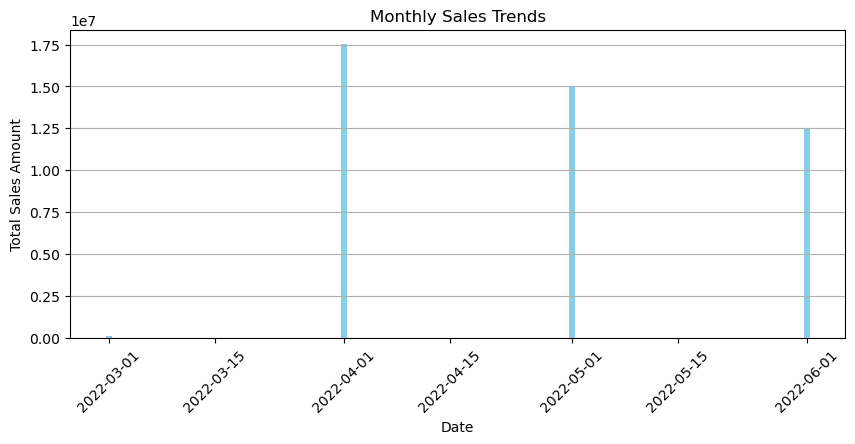

In [138]:
# Bar plot for monthly sales trends---

plt.figure(figsize=(10, 4))
plt.bar(sales_over_time['Date'], sales_over_time['Amount'], color='skyblue')
plt.title('Monthly Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

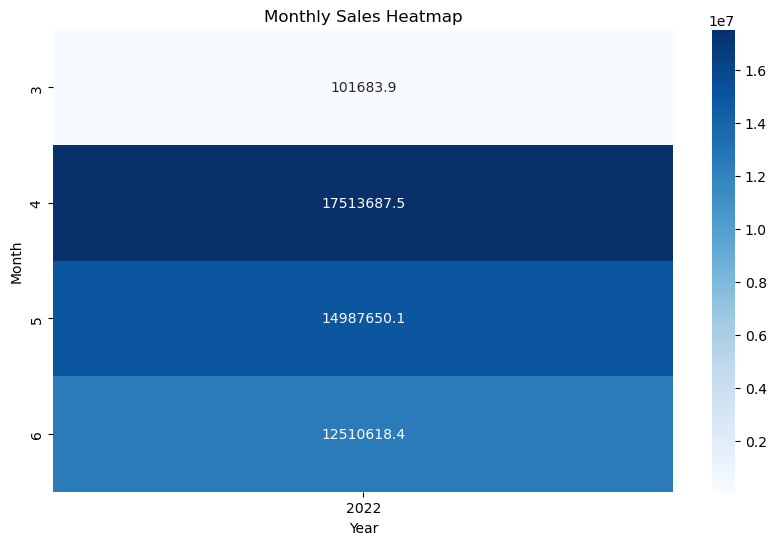

In [139]:
import seaborn as sns

# Prepare data for heatmap
sales_over_time['Year'] = sales_over_time['Date'].dt.year
sales_over_time['Month'] = sales_over_time['Date'].dt.month
sales_pivot = sales_over_time.pivot(index='Month', columns='Year', values='Amount')

# Heatmap for monthly sales trends
plt.figure(figsize=(10, 6))
sns.heatmap(sales_pivot, annot=True, fmt=".1f", cmap='Blues')
plt.title('Monthly Sales Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

# Product analysis

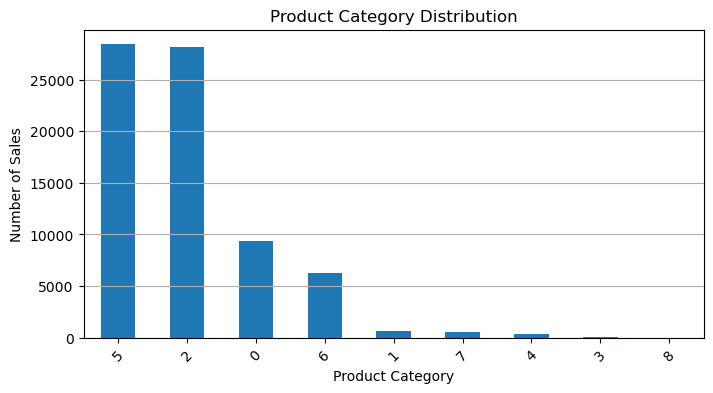

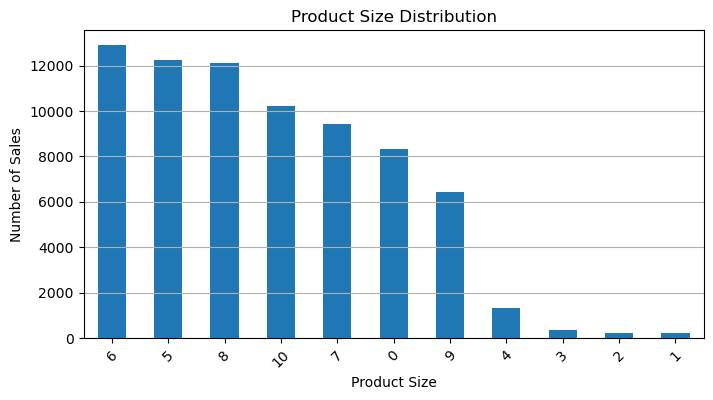

In [140]:
# Distribution of product categories
product_categories = df['Category'].value_counts()

# Plot distribution of product categories
plt.figure(figsize=(8, 4))
product_categories.plot(kind='bar')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Distribution of sizes sold
product_sizes = df['Size'].value_counts()

# Plot distribution of product sizes
plt.figure(figsize=(8, 4))
product_sizes.plot(kind='bar')
plt.title('Product Size Distribution')
plt.xlabel('Product Size')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Fulfillment method distribution

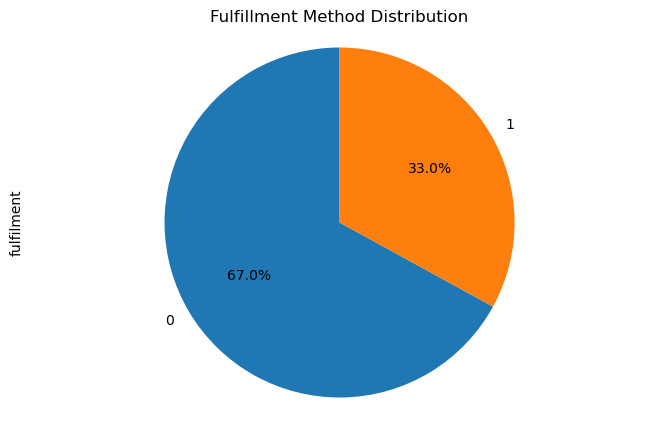

In [141]:
fulfillment_methods = df['fulfilment'].value_counts()

# Plot distribution of fulfillment methods
plt.figure(figsize=(8, 5))
fulfillment_methods.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Fulfillment Method Distribution')
plt.axis('equal')
plt.show()


# Customer Segmentation

In [142]:
# Calculate Recency, Frequency, Monetary values
rfm = df.groupby('Order ID').agg({
    'Date': lambda x: (pd.Timestamp('now') - x.max()).days,
    'Order ID': 'count',
    'Amount': 'sum'
}).rename(columns={'Date': 'Recency', 'Order ID': 'Frequency', 'Amount': 'Monetary'})

# Define RFM segments
rfm['R_Segment'] = pd.qcut(rfm['Recency'], 4, ['1', '2', '3', '4'])
rfm['F_Segment'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, ['4', '3', '2', '1'])
rfm['M_Segment'] = pd.qcut(rfm['Monetary'], 4, ['1', '2', '3', '4'])

# Concatenate RFM segments
rfm['RFM_Segment'] = rfm['R_Segment'].astype(str) + rfm['F_Segment'].astype(str) + rfm['M_Segment'].astype(str)
rfm['RFM_Score'] = rfm[['R_Segment', 'F_Segment', 'M_Segment']].sum(axis=1).astype(int)

print(rfm.head())

                     Recency  Frequency  Monetary R_Segment F_Segment  \
Order ID                                                                
171-0005637-8167567      746          1     579.0         3         4   
171-0005741-2261112      699          1     558.0         1         4   
171-0005999-3189913      768          1    1115.0         4         4   
171-0006482-2020369      760          1     368.0         3         4   
171-0007212-7125106      762          1    1092.0         3         4   

                    M_Segment RFM_Segment  RFM_Score  
Order ID                                              
171-0005637-8167567         2         342        342  
171-0005741-2261112         2         142        142  
171-0005999-3189913         4         444        444  
171-0006482-2020369         1         341        341  
171-0007212-7125106         4         344        344  


# Geographical Analysis

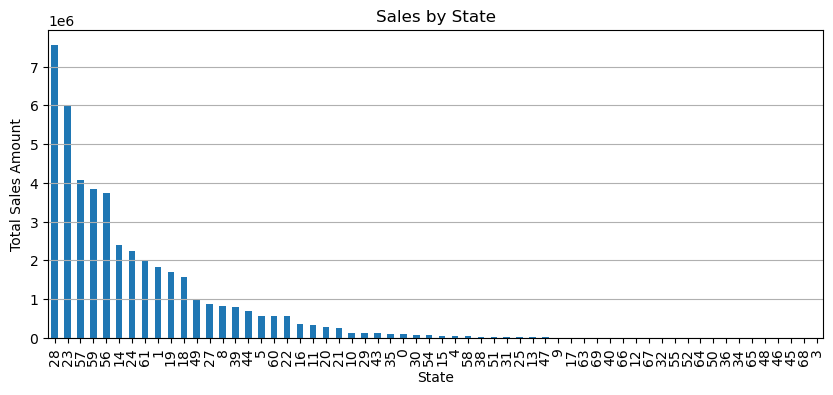

In [143]:
# Group by state and city, then sum the amounts
geographical_sales = df.groupby(['ship_state', 'ship_city']).agg({'Amount': 'sum'}).reset_index()

# Plot sales by state
sales_by_state = geographical_sales.groupby('ship_state')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 4))
sales_by_state.plot(kind='bar')
plt.title('Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

<Axes: >

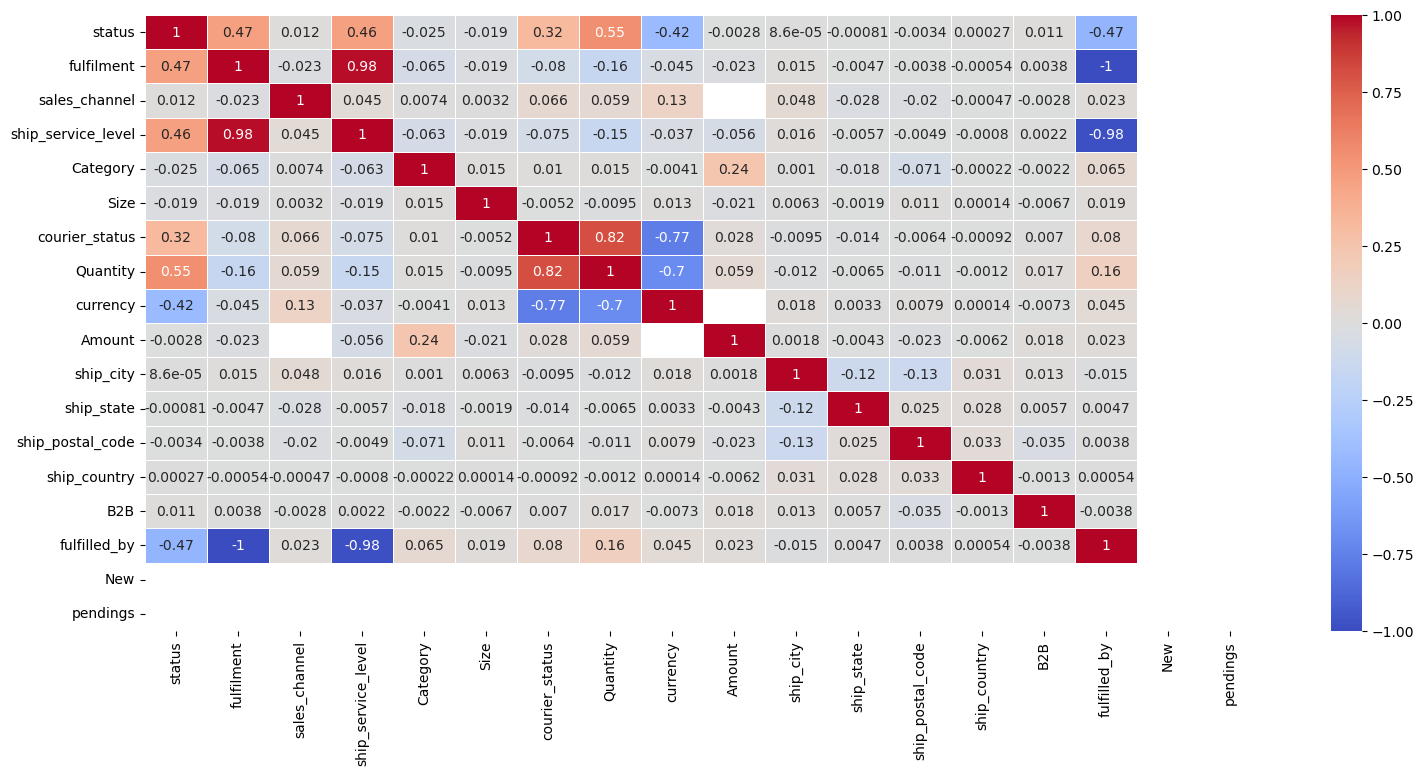

In [153]:
import seaborn as sns
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5)